In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [16]:
df = pd.read_csv('./../data/processed/preprocess_spy.csv', header=0, index_col=0)
df.head()

date  dividends   week_day  month  day  quarter  diff_close_close  \
0  2020-01-02        0.0   Thursday      1    2        1          2.790588   
1  2020-01-03        0.0     Friday      1    3        1         -2.280609   
2  2020-01-06        0.0     Monday      1    6        1          1.140289   
3  2020-01-07        0.0    Tuesday      1    7        1         -0.843567   
4  2020-01-08        0.0  Wednesday      1    8        1          1.594543   

   pct_change  pct_open_close  pct_close_open  ...   ph  spgi  trow      tsla  \
0    0.009352        0.005220        0.004111  ...  0.0   0.0   0.0  0.317294   
1   -0.007572       -0.011420        0.003892  ...  0.0   0.0   0.0  0.068317   
2    0.003815       -0.005955        0.009829  ...  0.0   0.0   0.0  0.056199   
3   -0.002811       -0.001915       -0.000898  ...  0.0   0.0   0.0  0.210498   
4    0.005329        0.000650        0.004676  ...  0.0   0.0   0.0  0.302827   

   tsm  txn       unh    v       wmt       xom  
0  0.0  0.0  0.000000  0.0  0.436396  0.000000  
1  0.0  0.0  0.000000  0.0  0.241386  0.000000  
2  0.0  0.0  0.000000  0.0 -0.410954  0.265997  
3  0.0  0.0  0.157431  0.0  0.059462  0.198767  
4  0.0  0.0  0.134564  0.0 -0.071081 -0.075503  

[5 rows x 53 columns]

In [17]:
df_wsj = pd.read_csv('./wsj_table.csv', header=0, index_col=0)
df_wsj.rename(columns={'Date':'date'}, inplace=True)
df_wsj.head()

date  sentiment_score
0  2021-02-01         0.097755
1  2021-02-02        -0.012792
2  2021-02-03         0.335863
3  2021-02-04         0.133875
4  2021-02-05         0.135117

In [18]:
df  =  pd.merge(df, df_wsj, on='date', how='inner')

In [19]:

df['dividends'] = df['dividends'].apply(lambda x: True if x > 0 else False).astype(int)
df.drop(columns=['day', 'quarter', 'seasonal_diff','diff_close_close'], inplace=True) 
df.drop(columns=[ 'high_open_ratio', 'high_close_ratio', 'low_open_ratio',
       'low_close_ratio'], inplace=True)


In [20]:
# from 2020 to 2025
spy = yf.Ticker("SPY")
hist = spy.history(start="2021-01-01", end="2025-01-31")
hist.head()



Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  354.457104  354.589339  344.549957  348.299377   
2021-01-05 00:00:00-05:00  347.647725  351.803248  347.600486  350.698242   
2021-01-06 00:00:00-05:00  349.168252  356.034336  348.611037  352.794891   
2021-01-07 00:00:00-05:00  355.203245  358.792099  355.023800  358.036560   
2021-01-08 00:00:00-05:00  359.443813  360.293802  356.147732  360.076599   

                              Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                          
2021-01-04 00:00:00-05:00  110210800        0.0           0.0            0.0  
2021-01-05 00:00:00-05:00   66426200        0.0           0.0            0.0  
2021-01-06 00:00:00-05:00  107997700        0.0           0.0            0.0  
2021-01-07 00:00:00-05:00   68766800        0.0           0.0            0.0  
2021-01-08 00:00:00-05:00   71677200        0.0           0.0            0.0

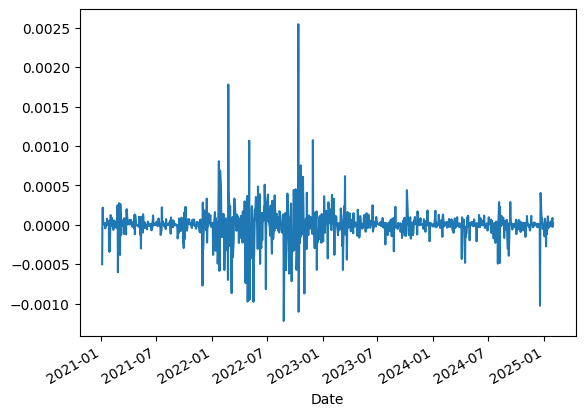

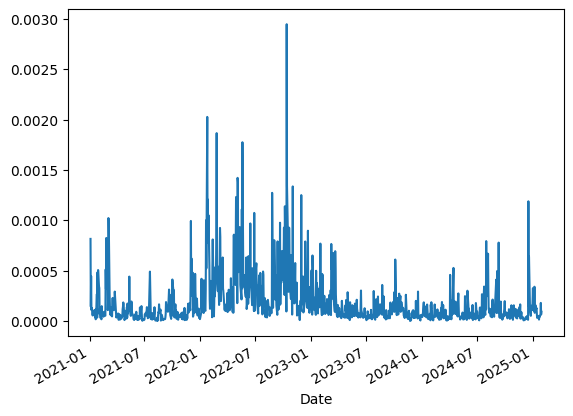

In [21]:




hist['product_open'] = (hist['High'] - hist['Low']) / (hist['Open'])
hist['product_close'] = (hist['High'] - hist['Low']) / (hist['Close'])

hist['product_diff'] = hist['product_open'] - hist['product_close']
hist['product'] = hist['product_open'] * hist['product_close']

hist['product_diff'].plot()
plt.show();

hist['product'].plot()
plt.show();




In [22]:
hist.head()

Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  354.457104  354.589339  344.549957  348.299377   
2021-01-05 00:00:00-05:00  347.647725  351.803248  347.600486  350.698242   
2021-01-06 00:00:00-05:00  349.168252  356.034336  348.611037  352.794891   
2021-01-07 00:00:00-05:00  355.203245  358.792099  355.023800  358.036560   
2021-01-08 00:00:00-05:00  359.443813  360.293802  356.147732  360.076599   

                              Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                           
2021-01-04 00:00:00-05:00  110210800        0.0           0.0            0.0   
2021-01-05 00:00:00-05:00   66426200        0.0           0.0            0.0   
2021-01-06 00:00:00-05:00  107997700        0.0           0.0            0.0   
2021-01-07 00:00:00-05:00   68766800        0.0           0.0            0.0   
2021-01-08 00:00:00-05:00   71677200        0.0           0.0            0.0   

                           product_open  product_close  product_diff   product  
Date                                                                            
2021-01-04 00:00:00-05:00      0.028323       0.028824     -0.000501  0.000816  
2021-01-05 00:00:00-05:00      0.012089       0.011984      0.000105  0.000145  
2021-01-06 00:00:00-05:00      0.021260       0.021041      0.000219  0.000447  
2021-01-07 00:00:00-05:00      0.010609       0.010525      0.000084  0.000112  
2021-01-08 00:00:00-05:00      0.011535       0.011514      0.000020  0.000133

In [23]:
hist['trend'] = hist.apply(lambda row: 1 if row['Close'] >= row['Open'] else 0, axis=1)


In [24]:
# to datetime
hist['date'] = pd.to_datetime(hist.index)
hist.reset_index(inplace=True, drop=True)

hist['date'] = hist['date'].dt.date 
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date


hist = hist[['date', 'product', 'product_diff',  'trend']]
df.drop(columns=['trend'], inplace=True)
# merge the two dataframes on the date
df = pd.merge(df, hist, on='date', how='left')

df.head(1)

date  dividends week_day  month  pct_change  pct_open_close  \
0  2021-02-01          0   Monday      2    0.016645        0.009863   

   pct_close_open  second_diff_seasonal  continuous_increased  \
0        0.006716              7.874817                     1   

   continuous_decreased  ...       tsm       txn  unh         v       wmt  \
0                     0  ... -0.457641  0.432653  0.0  0.425617  0.212278   

        xom  sentiment_score   product  product_diff  trend  
0  0.099229         0.097755  0.000345      0.000124      1  

[1 rows x 48 columns]

In [25]:
# one hot encoding for weekdays

df = pd.get_dummies(df, columns=['week_day'], dtype=int)

In [26]:
df.columns

Index(['date', 'dividends', 'month', 'pct_change', 'pct_open_close',
       'pct_close_open', 'second_diff_seasonal', 'continuous_increased',
       'continuous_decreased', 'aapl', 'acn', 'adi', 'ame', 'amp', 'amzn',
       'aph', 'avgo', 'brk-b', 'cost', 'dov', 'googl', 'hd', 'intu', 'itw',
       'jpm', 'lly', 'ma', 'mco', 'meta', 'msft', 'nvda', 'orcl', 'payx', 'ph',
       'spgi', 'trow', 'tsla', 'tsm', 'txn', 'unh', 'v', 'wmt', 'xom',
       'sentiment_score', 'product', 'product_diff', 'trend',
       'week_day_Friday', 'week_day_Monday', 'week_day_Thursday',
       'week_day_Tuesday', 'week_day_Wednesday'],
      dtype='object')

In [27]:

# convert the month integer to datetime and then to string (ex. Jan) and one hot encode it
df['month'] = df['month'].apply(lambda x: pd.to_datetime(f'2020-{x}-01').strftime('%b'))

df = pd.get_dummies(df, columns=['month'], dtype=int)

df.columns



Index(['date', 'dividends', 'pct_change', 'pct_open_close', 'pct_close_open',
       'second_diff_seasonal', 'continuous_increased', 'continuous_decreased',
       'aapl', 'acn', 'adi', 'ame', 'amp', 'amzn', 'aph', 'avgo', 'brk-b',
       'cost', 'dov', 'googl', 'hd', 'intu', 'itw', 'jpm', 'lly', 'ma', 'mco',
       'meta', 'msft', 'nvda', 'orcl', 'payx', 'ph', 'spgi', 'trow', 'tsla',
       'tsm', 'txn', 'unh', 'v', 'wmt', 'xom', 'sentiment_score', 'product',
       'product_diff', 'trend', 'week_day_Friday', 'week_day_Monday',
       'week_day_Thursday', 'week_day_Tuesday', 'week_day_Wednesday',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep'],
      dtype='object')

In [28]:
df.columns

Index(['date', 'dividends', 'pct_change', 'pct_open_close', 'pct_close_open',
       'second_diff_seasonal', 'continuous_increased', 'continuous_decreased',
       'aapl', 'acn', 'adi', 'ame', 'amp', 'amzn', 'aph', 'avgo', 'brk-b',
       'cost', 'dov', 'googl', 'hd', 'intu', 'itw', 'jpm', 'lly', 'ma', 'mco',
       'meta', 'msft', 'nvda', 'orcl', 'payx', 'ph', 'spgi', 'trow', 'tsla',
       'tsm', 'txn', 'unh', 'v', 'wmt', 'xom', 'sentiment_score', 'product',
       'product_diff', 'trend', 'week_day_Friday', 'week_day_Monday',
       'week_day_Thursday', 'week_day_Tuesday', 'week_day_Wednesday',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep'],
      dtype='object')

In [29]:
# move trend to the end

df[['pct_change', 'pct_close_open','second_diff_seasonal','continuous_increased','continuous_decreased', 'product', 'product_diff', 'aapl', 'acn', 'adi', 'ame', 'amp', 'amzn', 'aph', 'avgo', 'brk-b',
       'cost', 'dov', 'googl', 'hd', 'intu', 'itw', 'jpm', 'lly', 'ma', 'mco',
       'meta', 'msft', 'nvda', 'orcl', 'payx', 'ph', 'spgi', 'trow', 'tsla',
       'tsm', 'txn', 'unh', 'v', 'wmt', 'xom', 'sentiment_score']] = df[['pct_change', 'pct_close_open','second_diff_seasonal','continuous_increased','continuous_decreased', 'product', 'product_diff', 'aapl', 'acn', 'adi', 'ame', 'amp', 'amzn', 'aph', 'avgo', 'brk-b',
       'cost', 'dov', 'googl', 'hd', 'intu', 'itw', 'jpm', 'lly', 'ma', 'mco',
       'meta', 'msft', 'nvda', 'orcl', 'payx', 'ph', 'spgi', 'trow', 'tsla',
       'tsm', 'txn', 'unh', 'v', 'wmt', 'xom','sentiment_score']].shift(1)






In [30]:
df.isna().sum()

date              0
dividends         0
pct_change        1
pct_open_close    0
pct_close_open    1
                 ..
month_Mar         0
month_May         0
month_Nov         0
month_Oct         0
month_Sep         0
Length: 63, dtype: int64

In [31]:
comp_dict = {}
for i, comp in enumerate(df.columns.tolist()):
    comp_dict[comp] = i

In [32]:
# move trend to last column

trend = df.pop('trend')
df['trend'] = trend

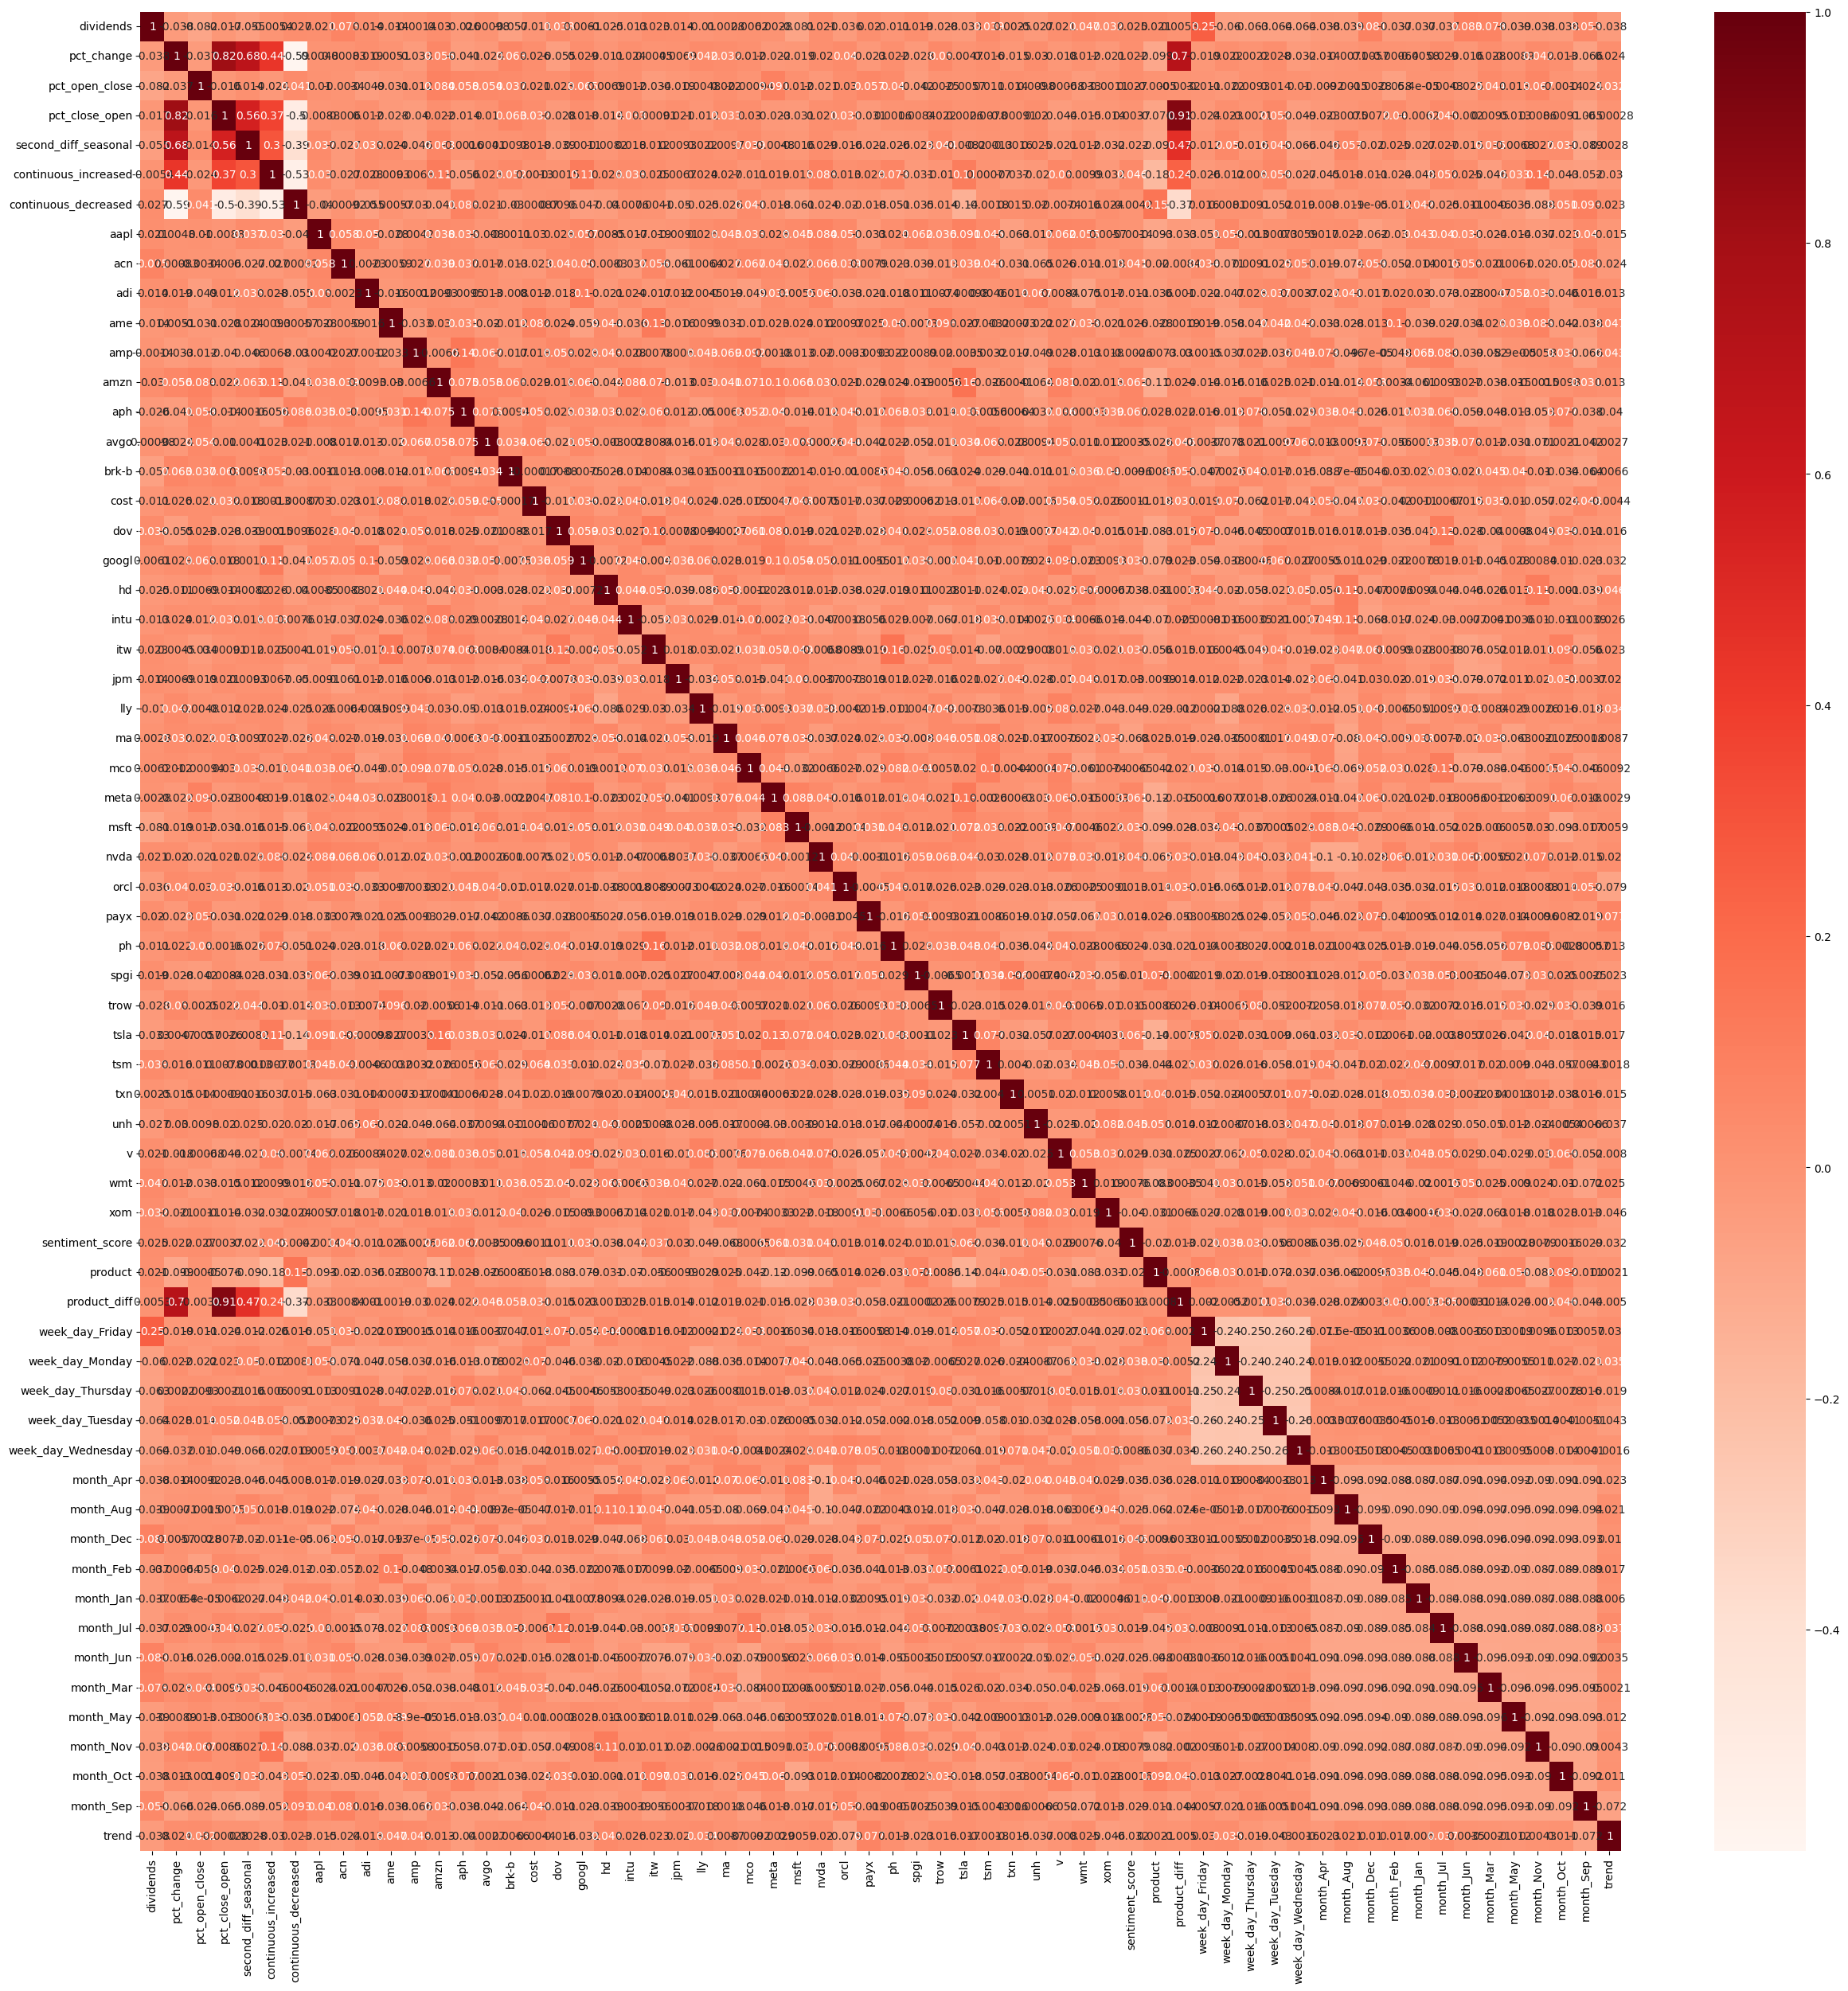

In [33]:
cor = df.loc[:, 'dividends':].corr()

# create a heat map

plt.figure(figsize=(30, 30))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [34]:
df.drop(columns='date').corr()['trend'].sort_values(ascending=False)

    


trend               1.000000
payx                0.076727
ame                 0.046789
hd                  0.045808
amp                 0.042639
                      ...   
aph                -0.040135
week_day_Tuesday   -0.042965
xom                -0.046049
month_Sep          -0.071649
orcl               -0.078597
Name: trend, Length: 62, dtype: float64

In [35]:
df.describe()

dividends  pct_change  pct_open_close  pct_close_open  \
count  964.00000  963.000000      964.000000      963.000000   
mean     0.01556    0.000696        0.000374        0.000322   
std      0.12383    0.010351        0.005983        0.008487   
min      0.00000   -0.043482       -0.025904       -0.033573   
25%      0.00000   -0.004928       -0.002543       -0.004114   
50%      0.00000    0.000699        0.000585        0.000656   
75%      0.00000    0.006549        0.003526        0.005115   
max      1.00000    0.054954        0.037206        0.047994   

       second_diff_seasonal  continuous_increased  continuous_decreased  \
count            963.000000            963.000000            963.000000   
mean               0.119612              1.202492              0.819315   
std                6.231837              1.616416              1.152851   
min              -21.284637              0.000000              0.000000   
25%               -3.613678              0.000000              0.000000   
50%                0.094391              1.000000              0.000000   
75%                3.884430              2.000000              1.000000   
max               28.215988             10.000000              6.000000   

             aapl         acn         adi  ...   month_Feb   month_Jan  \
count  959.000000  959.000000  959.000000  ...  964.000000  964.000000   
mean     0.123702    0.061797    0.025510  ...    0.078838    0.077801   
std      0.165361    0.138589    0.103142  ...    0.269626    0.267997   
min     -0.474095   -0.446662   -0.470259  ...    0.000000    0.000000   
25%      0.017981    0.000000    0.000000  ...    0.000000    0.000000   
50%      0.152546    0.000000    0.000000  ...    0.000000    0.000000   
75%      0.228867    0.158285    0.000000  ...    0.000000    0.000000   
max      0.475247    0.475739    0.474256  ...    1.000000    1.000000   

        month_Jul   month_Jun   month_Mar   month_May   month_Nov   month_Oct  \
count  964.000000  964.000000  964.000000  964.000000  964.000000  964.000000   
mean     0.077801    0.084025    0.089212    0.086100    0.081950    0.084025   
std      0.267997    0.277569    0.285197    0.280657    0.274431    0.277569   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        month_Sep       trend  
count  964.000000  964.000000  
mean     0.084025    0.549793  
std      0.277569    0.497773  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000  

[8 rows x 62 columns]

In [36]:
# standardize the data
from sklearn.preprocessing import StandardScaler

# columns to standardize

stnd_list = ['pct_change', 'pct_close_open', 'second_diff_seasonal',
       'continuous_increased', 'continuous_decreased', 'product',
       'product_diff', 'aapl', 'acn', 'adi', 'ame', 'amp', 'amzn', 'aph',
       'avgo', 'brk-b', 'cost', 'dov', 'googl', 'hd', 'intu', 'itw', 'jpm',
       'lly', 'ma', 'mco', 'meta', 'msft', 'nvda', 'orcl', 'payx', 'ph',
       'spgi', 'trow', 'tsla', 'tsm', 'txn', 'unh', 'v', 'wmt', 'xom']

scaler = StandardScaler()

df[stnd_list] = scaler.fit_transform(df[stnd_list])

df.dropna(inplace=True)

df.head()

date  dividends  pct_change  pct_open_close  pct_close_open  \
1  2021-02-02          0    1.541652        0.009090        0.753847   
2  2021-02-03          0    1.299514        0.002332        0.552049   
3  2021-02-04          0    0.008742        0.002907       -0.219838   
4  2021-02-05          0    1.031354        0.005205        0.956394   
5  2021-02-08          0    0.313175        0.004024       -0.186778   

   second_diff_seasonal  continuous_increased  continuous_decreased      aapl  \
1              1.245096             -0.125337             -0.711055 -0.192630   
2              0.439501              0.493637             -0.711055  0.861795   
3              0.039557              1.112611             -0.711055  0.751993   
4              1.746142              1.731585             -0.711055  1.275401   
5             -0.253174              2.350559             -0.711055  0.245138   

        acn  ...  month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
1 -0.446136  ...          1          0          0          0          0   
2  1.055405  ...          1          0          0          0          0   
3  1.178664  ...          1          0          0          0          0   
4 -0.446136  ...          1          0          0          0          0   
5  2.285396  ...          1          0          0          0          0   

   month_May  month_Nov  month_Oct  month_Sep  trend  
1          0          0          0          0      1  
2          0          0          0          0      0  
3          0          0          0          0      1  
4          0          0          0          0      0  
5          0          0          0          0      1  

[5 rows x 63 columns]

In [37]:
df.drop(columns='date', inplace=True)

In [38]:


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

X = df.drop(columns='trend')
y = df['trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(100, 100))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show();

0.5260416666666666


In [39]:
feature_importances = clf.feature_importances_
feature_names = X_train.columns  # Eğer pandas DataFrame kullanıyorsanız
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df[:20])

                 Feature  Importance
22                   jpm    0.156707
40                   xom    0.143737
1             pct_change    0.097772
43          product_diff    0.097051
24                    ma    0.083454
19                    hd    0.070866
37                   unh    0.067468
36                   txn    0.062356
4   second_diff_seasonal    0.060751
42               product    0.051574
27                  msft    0.038232
41       sentiment_score    0.036111
10                   ame    0.033923
38                     v    0.000000
39                   wmt    0.000000
45       week_day_Monday    0.000000
44       week_day_Friday    0.000000
0              dividends    0.000000
46     week_day_Thursday    0.000000
34                  tsla    0.000000


In [40]:
# create a confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)



array([[ 8, 81],
       [10, 93]])

<Figure size 1200x600 with 0 Axes>

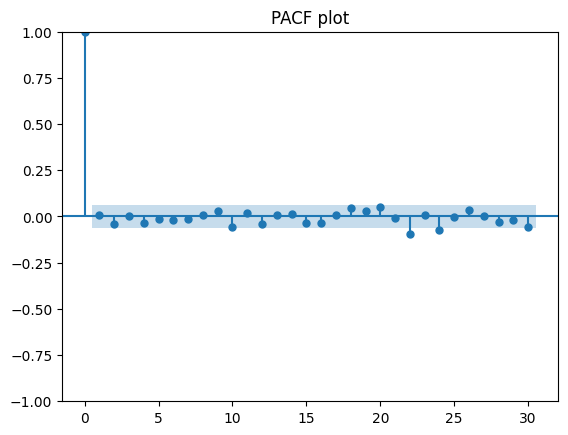

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df['pct_change'], lags=30)  # PACF grafiğini oluşturuyoruz
plt.title("PACF plot")
plt.show()

In [42]:
 for i in range(1, 30):
     print(df['pct_change'].rolling(window=i).sum().corr(df['pct_change'], method='pearson'), i)

1.0 1
0.7087779457464768 2
0.5623765087460686 3
0.4911045961785371 4
0.4267522917453523 5
0.3880563379021815 6
0.35482283432891276 7
0.3313286305289488 8
0.3188384471864599 9
0.3133558195195986 10
0.2822621127152153 11
0.2773931971429701 12
0.2568563410116308 13
0.2505706261582014 14
0.2491133950599442 15
0.23268992990774995 16
0.21787687430581287 17
0.21476645395972488 18
0.22337499550584727 19
0.2257315261943745 20
0.23177780890025496 21
0.22399304308363321 22
0.19802841531000712 23
0.19590291994179315 24
0.17617137841420352 25
0.17266732501454563 26
0.17977928404378396 27
0.17827739247671423 28
0.17007851720281994 29


In [43]:
for i in range(1,30):
    print(df['pct_change'].shift(i).corr(df['pct_change'], method='pearson'), i)

0.00593629543008917 1
-0.038510872982615796 2
0.0018691804218804757 3
-0.03507887234623674 4
-0.011728654196644645 5
-0.01798894109067324 6
-0.010853626078671384 7
0.012361754427608802 8
0.031542909547003194 9
-0.055426322760699746 10
0.018650310652416967 11
-0.03854840627163442 12
0.003227994328175852 13
0.02101579623644456 14
-0.03903247012073505 15
-0.03533769166567306 16
0.010874647600529423 17
0.04654998426921905 18
0.03124103322422938 19
0.057028770747192904 20
-0.011045554049477786 21
-0.09673357182633109 22
0.005812334116391614 23
-0.07278832823963259 24
-0.005841246203250062 25
0.04847868631052422 26
0.00778056683572951 27
-0.02328866416976901 28
-0.019101794414741594 29


In [44]:
df['trend_lag'] = df['trend'].shift(7)

df['pct_change_lag'] = df['pct_change'].shift(1)

df.dropna(inplace=True)


<Figure size 1200x600 with 0 Axes>

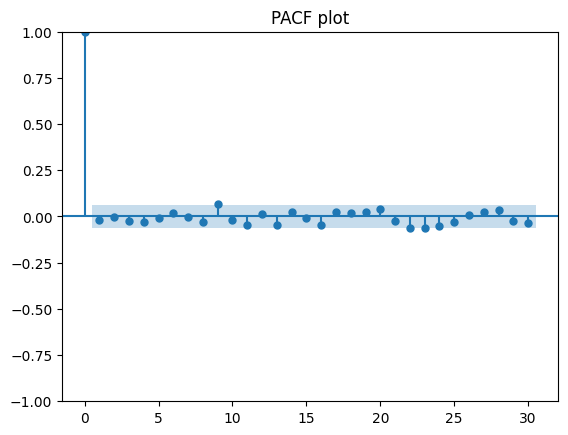

In [45]:
plt.figure(figsize=(12, 6))
plot_pacf(df['trend'], lags=30)  # PACF grafiğini oluşturuyoruz
plt.title("PACF plot")
plt.show()

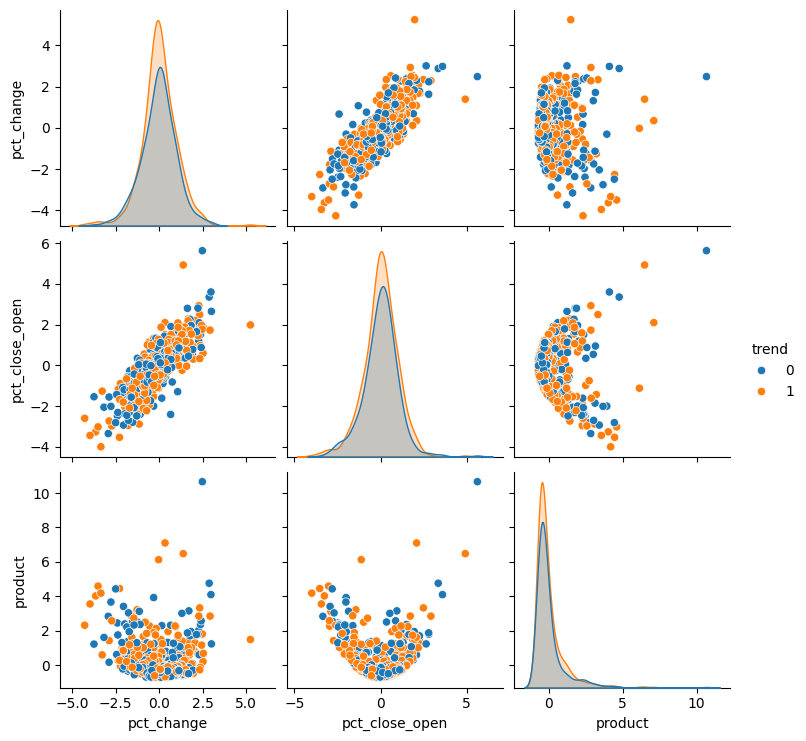

In [46]:
# pairplot
sns.pairplot(df[['pct_change', 'pct_close_open', 'product', 'trend']], hue='trend')

In [47]:
df.head()

dividends  pct_change  pct_open_close  pct_close_open  \
8           0   -0.109335        0.002974       -0.651306   
9           0    0.088877       -0.002201       -0.197668   
10          0    0.410191        0.003362        0.805760   
11          0   -0.150912       -0.004792       -0.534723   
12          0   -0.045066       -0.007136        0.556913   

    second_diff_seasonal  continuous_increased  continuous_decreased  \
8              -0.589036             -0.744312              1.024676   
9               0.095491             -0.125337             -0.711055   
10              0.525552              0.493637             -0.711055   
11             -0.557301             -0.744312              0.156811   
12             -0.562872             -0.125337             -0.711055   

        aapl       acn       adi  ...  month_Jul  month_Jun  month_Mar  \
8   1.579719 -0.446136 -0.247460  ...          0          0          0   
9   0.650462 -0.446136 -0.247460  ...          0          0          0   
10  0.961345 -0.446136 -0.247460  ...          0          0          0   
11  0.393388  1.024532 -0.247460  ...          0          0          0   
12  0.570358  1.653462  1.588956  ...          0          0          0   

    month_May  month_Nov  month_Oct  month_Sep  trend  trend_lag  \
8           0          0          0          0      0        1.0   
9           0          0          0          0      1        0.0   
10          0          0          0          0      0        1.0   
11          0          0          0          0      1        0.0   
12          0          0          0          0      1        1.0   

    pct_change_lag  
8        -0.131597  
9        -0.109335  
10        0.088877  
11        0.410191  
12       -0.150912  

[5 rows x 64 columns]

In [48]:
df[['pct_change_lag', 'pct_close_open_lag', 'product_lag']] = df[['pct_change', 'pct_close_open', 'product']].shift(6)
df['trend_lag'] = df['trend'].shift(7)

In [49]:
df[['pct_change_lag', 'pct_close_open_lag', 'product_lag', 'trend_lag', 'trend']].corr(method='pearson')

pct_change_lag  pct_close_open_lag  product_lag  \
pct_change_lag            1.000000            0.816640    -0.098388   
pct_close_open_lag        0.816640            1.000000    -0.076070   
product_lag              -0.098388           -0.076070     1.000000   
trend_lag                 0.620990            0.735479    -0.088794   
trend                    -0.028607           -0.020465     0.003008   

                    trend_lag     trend  
pct_change_lag       0.620990 -0.028607  
pct_close_open_lag   0.735479 -0.020465  
product_lag         -0.088794  0.003008  
trend_lag            1.000000 -0.002089  
trend               -0.002089  1.000000

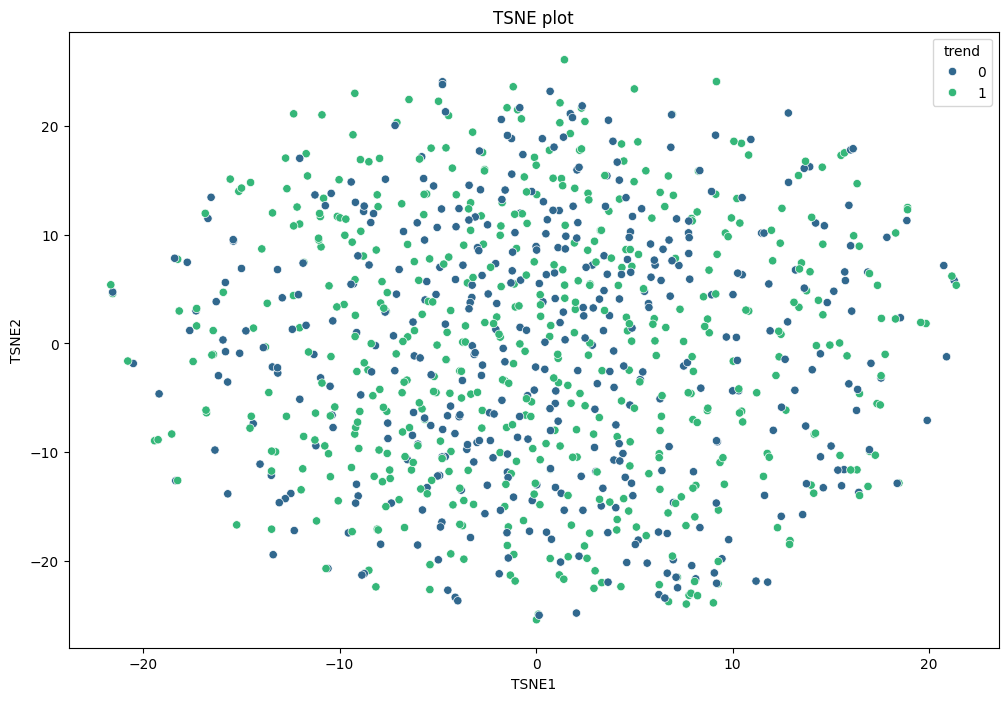

In [50]:
from sklearn.manifold import TSNE

# Initialize TSNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the TSNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['trend'] = y.values

# Plot the TSNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='trend', data=tsne_df, palette='viridis')
plt.title('TSNE plot')
plt.show()

In [51]:
df.dropna(inplace=True)
# trend to last column
trend = df.pop('trend')
df['trend'] = trend


2025-02-04 00:22:14.139295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-04 00:22:17.242119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 00:22:17.243829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split

Epoch 1/20


2025-02-04 00:22:17.670978: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 00:22:17.672431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 00:22:17.673398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11/21 [==============>...............] - ETA: 0s - loss: 0.5612 - accuracy: 0.7500 

2025-02-04 00:22:20.205365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 00:22:20.206619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 00:22:20.207533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 3s 36ms/step - loss: 0.5624 - accuracy: 0.7545 - val_loss: 0.5523 - val_accuracy: 0.7600
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5585 - accuracy: 0.7574 - val_loss: 0.5499 - val_accuracy: 0.7600
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5563 - accuracy: 0.7574 - val_loss: 0.5483 - val_accuracy: 0.7600
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7574 - val_loss: 0.5459 - val_accuracy: 0.7600
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5526 - accuracy: 0.7574 - val_loss: 0.5442 - val_accuracy: 0.7600
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.5480 - accuracy: 0.7574 - val_loss: 0.5369 - val_accuracy: 0.7600
Epoch 7/20
21/21 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 0.7574 - val_loss: 0.5303 - val_accuracy: 0.7600
Epoch 8/20
21/21 [============

2025-02-04 00:22:23.184548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-04 00:22:23.185932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-04 00:22:23.187017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 [==============================] - 0s 3ms/step
Train RMSE: 0.3923635174844169
Test RMSE: 0.46249729006288026


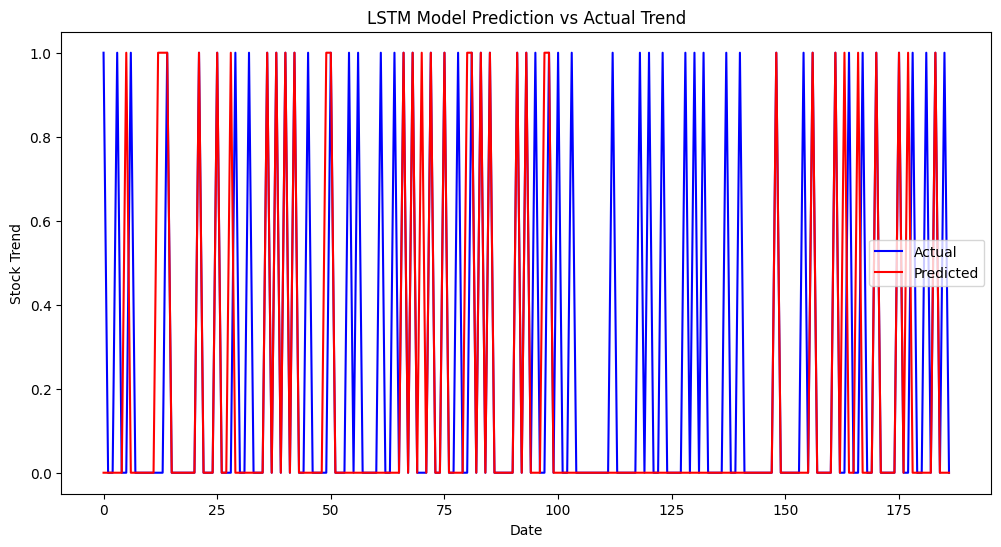

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Scale the data (assuming df is your dataset with 'trend' as the last column)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        
        # Here, we compute the binary labels (1 for upward movement, 0 for downward movement)
        if data[i + time_step, -1] > data[i + time_step - 1, -1]:  # Trend increase
            y.append(1)
        else:  # Trend decrease
            y.append(0)
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Build the LSTM model
model = Sequential()

# Adding LSTM layers with Dropout for regularization
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary output

# Compile the model with binary crossentropy loss for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation split
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Convert the continuous predictions into binary (0 or 1) based on the sigmoid output
train_predict_binary = (train_predict > 0.5).astype(int)
test_predict_binary = (test_predict > 0.5).astype(int)

# Inverse transform the predictions to the original scale
train_predict_inverse = scaler.inverse_transform(np.concatenate((train_predict_binary, np.zeros((train_predict_binary.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
test_predict_inverse = scaler.inverse_transform(np.concatenate((test_predict_binary, np.zeros((test_predict_binary.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Inverse transform the actual values
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Calculate RMSE (Root Mean Squared Error) for better evaluation
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict_inverse))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict_inverse))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predict_inverse, label='Predicted', color='red')
plt.title('LSTM Model Prediction vs Actual Trend')
plt.xlabel('Date')
plt.ylabel('Stock Trend')
plt.legend()
plt.show()


In [53]:
confusion_matrix(y_test_actual, test_predict_inverse)

array([[123,  11],
       [ 29,  24]])

In [54]:
accuracy_score(y_test_actual, test_predict_inverse)

0.786096256684492

In [60]:
clf = DecisionTreeClassifier(max_depth=5)

# Split the data into training and testing sets

X = df.drop(columns='trend')
y = df['trend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(100, 100))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show();

0.5026455026455027


In [61]:
# create a classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.35      0.09      0.15        87
           1       0.52      0.85      0.65       102

    accuracy                           0.50       189
   macro avg       0.44      0.47      0.40       189
weighted avg       0.44      0.50      0.42       189



In [62]:
# try xgboost
from xgboost import XGBClassifier



xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.48677248677248675


In [63]:
# create a confusion matrix

confusion_matrix(y_test, y_pred)



array([[25, 62],
       [35, 67]])

In [64]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

# create a confusion matrix

confusion_matrix(y_test, y_pred)


0.5291005291005291


array([[42, 45],
       [44, 58]])

In [65]:
# neural network tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

y_pred = model.predict(X_test)

y_pred = [1 if x > 0.5 else 0 for x in y_pred]

print(accuracy_score(y_test, y_pred))

# create a confusion matrix

confusion_matrix(y_test, y_pred)


Epoch 1/1000
24/24 [==============================] - 1s 1ms/step - loss: 0.6961 - accuracy: 0.5370
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.6530 - accuracy: 0.5873
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.6931
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.5797 - accuracy: 0.7090
Epoch 5/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7712
Epoch 6/1000
24/24 [==============================] - 0s 873us/step - loss: 0.4749 - accuracy: 0.8161
Epoch 7/1000
24/24 [==============================] - 0s 858us/step - loss: 0.3961 - accuracy: 0.8690
Epoch 8/1000
24/24 [==============================] - 0s 846us/step - loss: 0.3169 - accuracy: 0.8902
Epoch 9/1000
24/24 [==============================] - 0s 935us/step - loss: 0.2382 - accuracy: 0.9431
Epoch 10/1000
24/24 [==============================] - 0s 870us/step - loss: 0.1666 - accura

array([[35, 52],
       [45, 57]])